In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.designs.design_multiplanar import MultiPlanar
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
# ?metal.qlibrary.core.QComponent.add_qgeometry

design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

# dir(QComponent)
design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

In [3]:
import numpy as np

def positions_list(num_obj, gap_between_obj, unit):
    """
    Generates a list of equally spaced positions

    Parameters:
        num_obj (int): The number of objects.
        gap_between_obj (float): The gap between each object.
        unit (str): The unit of measurement for the positions.

    Returns:
        (list): A list of positions as strings with the unit of measurement.
    """
    return_pos_list = [i*gap_between_obj for i in range(num_obj)]
    return_array = np.array(return_pos_list)
    if bool(int(num_obj) % 2 == 0):  #if even number of objects...
        return_array = return_array - gap_between_obj / 2
        return_array = return_array - (num_obj/2 - 1) * gap_between_obj
    else: #if odd number of objects...
        return_array = return_array - (num_obj/2 - 0.5) * gap_between_obj
    
    return [str(num)+str(unit) for num in return_array]  

In [4]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround


In [5]:
### Top and Bottom
options = Dict(
    orientation = -90,
    pos_y = 2.5 - 0.6,
    pad_width = '160um',
    pad_length = '200um',
    tapper_height = '200um'
)
wb1 = LaunchpadWirebond(design, 'wb_top', options=options)

options = Dict(
    orientation = 90,
    pos_y = -2.5 + 0.6,
    pad_width = '160um',
    pad_length = '200um',
    tapper_height = '200um'
)
wb2 = LaunchpadWirebond(design, 'wb_bottom', options=options)

In [6]:
class ATransmonCross(QComponent):
    """
    Use this class as a template for your components - have fun

    Description:

    Options:
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(x_len = '500um',
                           y_len = '500um',
                           width = '50um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""

    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        # EDIT HERE - Replace the following with your code
        # Create some raw geometry
        # Use autocompletion for the `draw.` module (use tab key)
        rect_x = draw.rectangle(p.x_len, p.width, p.pos_x, p.pos_y)
        rect_y = draw.rectangle(p.width, p.y_len, p.pos_x, p.pos_y)
        i_cross = rect_x.union(rect_y)

        rect_x_o = draw.rectangle()

        geom = {'inner_cross': i_cross}
        self.add_qgeometry('poly', geom, layer=p.layer, subtract=False)

In [41]:
xmon1_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-1500um',
    pos_y = '1200um'
)

# Create a new Transmon Cross object with name 'Q1'
q1 = TransmonCross(design, 'Q1', options=xmon1_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='-30um',  
                   pos_y='1313um', 
                   orientation='90')

otg = OpenToGround(design, 'open_to_ground', options=otg_options)

In [8]:
xmon2_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185.9um',
                 ground_spacing = '4.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '200.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '2000.9um',
    pos_y = '1700um'
)

# Create a new Transmon Cross object with name 'Q1'
q2 = TransmonCross(design, 'Q2', options=xmon2_options)

In [9]:
xmon3_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185um',
                 ground_spacing = '5um', 
                 claw_gap = '5.1um', 
                 claw_width = '10um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30um',
    cross_length = '200um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-2000um',
    pos_y = '-300um'
)

# Create a new Transmon Cross object with name 'Q1'
q3 = TransmonCross(design, 'Q3', options=xmon3_options)

In [10]:
xmon4_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '1500um',
    pos_y = '250um'
)

# Create a new Transmon Cross object with name 'Q1'
q4 = TransmonCross(design, 'Q4', options=xmon4_options)

In [11]:
xmon5_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    pos_y = '-1500um'
)

# Create a new Transmon Cross object with name 'Q1'
q5 = TransmonCross(design, 'Q5', options=xmon5_options)

In [12]:
xmon6_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '200.9um',
                 ground_spacing = '10.9um', 
                 claw_gap = '5.1um', 
                 claw_width = '10.9um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '220.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '2000um',
    pos_y = '-1200um'
)

# Create a new Transmon Cross object with name 'Q1'
q6 = TransmonCross(design, 'Q6', options=xmon6_options)

In [13]:
RouteStraight.get_template_options(design)
feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'wb_top',
                                                        pin = 'tie'),
                                       end_pin = Dict(component = 'wb_bottom',
                                                      pin = 'tie')))
feedline = RouteStraight(design, 'feedline', options = feedline_opts)

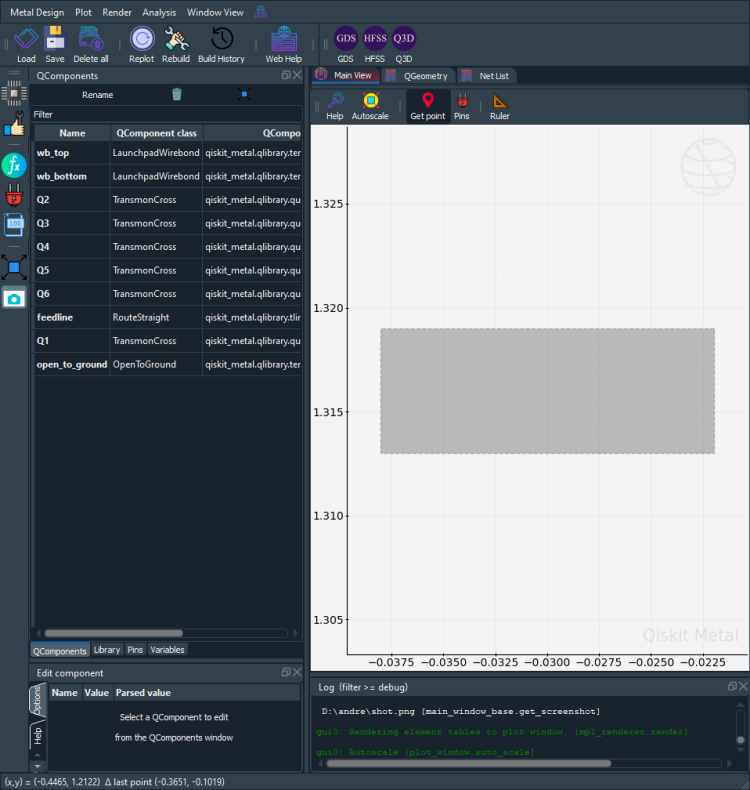

In [42]:
gui.rebuild()
gui.autoscale()
gui.zoom_on_components([otg.name])
gui.screenshot()